In [1]:
# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Нормализация данных до диапазона [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразование меток в категориальные (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 274s 2us/step


In [3]:
# Инициализация последовательной модели
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Слой пулинга
model.add(MaxPooling2D((2, 2)))

# Второй сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Слой пулинга
model.add(MaxPooling2D((2, 2)))

# Преобразование данных в одномерный вектор
model.add(Flatten())

# Полносвязный слой
model.add(Dense(64, activation='relu'))

# Выходной слой с softmax для классификации на 10 классов
model.add(Dense(10, activation='softmax'))

c:\Users\Дом\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3556 - loss: 1.7710 - val_accuracy: 0.5667 - val_loss: 1.2415
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5777 - loss: 1.2086 - val_accuracy: 0.6137 - val_loss: 1.0897
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6376 - loss: 1.0412 - val_accuracy: 0.6576 - val_loss: 0.9866
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6761 - loss: 0.9358 - val_accuracy: 0.6568 - val_loss: 0.9883
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7021 - loss: 0.8552 - val_accuracy: 0.6839 - val_loss: 0.9168
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7263 - loss: 0.7914 - val_accuracy: 0.6819 - val_loss: 0.9249
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7430 - loss: 0.7406 - val_accuracy: 0.7029 - val_loss: 0.8779
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7574 - loss: 0.6926 - val_accuracy: 0.

In [6]:
# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность на тестовых данных: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7103 - loss: 0.8717
Точность на тестовых данных: 70.43%


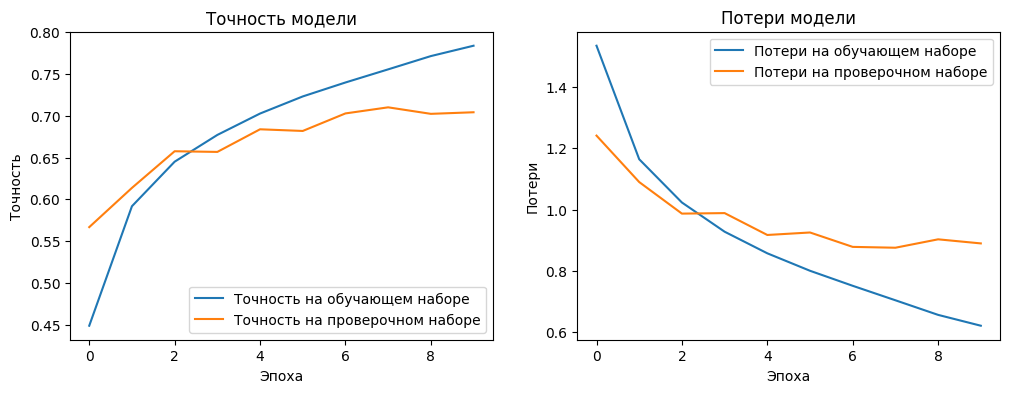

In [7]:
# Построение графика точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на проверочном наборе')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# Построение графика потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на проверочном наборе')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.show()

In [8]:
# Второй этап: Реализация архитектуры AlexNet
# Инициализация последовательной модели
alexnet_model = Sequential()

# Первый сверточный слой
alexnet_model.add(Conv2D(96, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Второй сверточный слой
alexnet_model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Третий сверточный слой
alexnet_model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))

# Четвертый сверточный слой
alexnet_model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))

# Пятый сверточный слой
alexnet_model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Преобразование данных в одномерный вектор
alexnet_model.add(Flatten())

# Первый полносвязный слой
alexnet_model.add(Dense(4096, activation='relu'))
# Второй полносвязный слой
alexnet_model.add(Dense(4096, activation='relu'))

# Выходной слой с softmax для классификации на 10 классов
alexnet_model.add(Dense(10, activation='softmax'))

In [9]:
alexnet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [11]:
alexnet_history = alexnet_model.fit(X_train, y_train,
                                    epochs=10,
                                    batch_size=128,
                                    validation_data=(X_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 219s 552ms/step - accuracy: 0.2487 - loss: 1.9810 - val_accuracy: 0.5029 - val_loss: 1.3380
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 216s 553ms/step - accuracy: 0.5563 - loss: 1.2225 - val_accuracy: 0.6353 - val_loss: 1.0294
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 215s 549ms/step - accuracy: 0.6574 - loss: 0.9689 - val_accuracy: 0.7021 - val_loss: 0.8577
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 213s 545ms/step - accuracy: 0.7271 - loss: 0.7754 - val_accuracy: 0.7160 - val_loss: 0.8094
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 213s 545ms/step - accuracy: 0.7659 - loss: 0.6695 - val_accuracy: 0.7415 - val_loss: 0.7516
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 212s 542ms/step - accuracy: 0.7968 - loss: 0.5708 - val_accuracy: 0.7339 - val_loss: 0.7758
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 212s 543ms/step - accuracy: 0.8282 - loss: 0.4910 - val_accuracy: 0.7442 - val_loss: 0.7717
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 212s 543ms/step - accuracy: 0.8581 -

In [12]:
# Оценка модели на тестовых данных
alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(X_test, y_test)
print(f'Точность AlexNet на тестовых данных: {alexnet_test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7527 - loss: 0.8674
Точность AlexNet на тестовых данных: 75.13%


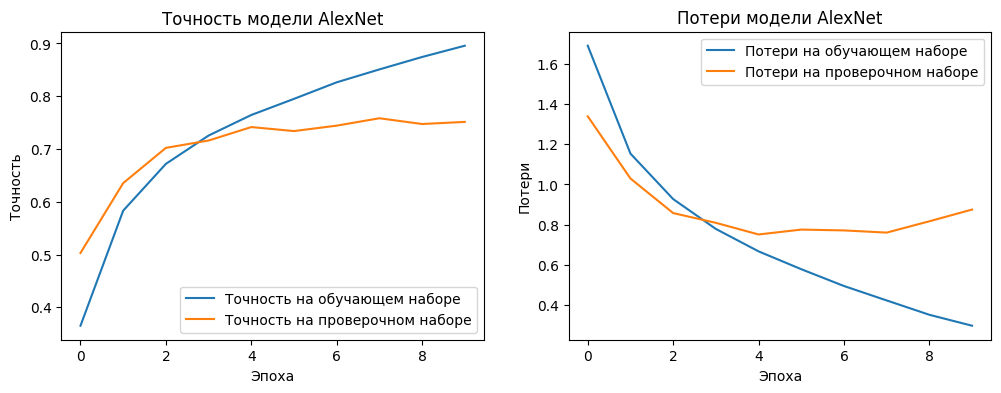

In [13]:
# Построение графика точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(alexnet_history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(alexnet_history.history['val_accuracy'], label='Точность на проверочном наборе')
plt.title('Точность модели AlexNet')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# Построение графика потерь
plt.subplot(1, 2, 2)
plt.plot(alexnet_history.history['loss'], label='Потери на обучающем наборе')
plt.plot(alexnet_history.history['val_loss'], label='Потери на проверочном наборе')
plt.title('Потери модели AlexNet')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.show()
